In [43]:
pip install tweepy pandas matplotlib textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df=pd.read_csv("C:\\Users\\dhivy\\Documents\\DSC PRGs\\Twitter sentiment analysis.csv")

In [4]:
df.head()

,Number,About,Reaction,Tweets
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Number    74682 non-null  int64 
 1   About     74682 non-null  object
 2   Reaction  74682 non-null  object
 3   Tweets    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df.describe()

,Number
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [7]:
df.isnull().sum()

Number        0
About         0
Reaction      0
Tweets      686
dtype: int64

In [8]:
df.dropna(subset=['Tweets'],inplace=True)

In [9]:
df

,Number,About,Reaction,Tweets
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [10]:
df.isnull().sum()

Number      0
About       0
Reaction    0
Tweets      0
dtype: int64

In [11]:
df['Reaction'].nunique()

4

In [12]:
df['Reaction'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

[Text(0, 0, 'Negative'),
 Text(1, 0, 'Positive'),
 Text(2, 0, 'Neutral'),
 Text(3, 0, 'Irrelevant')]

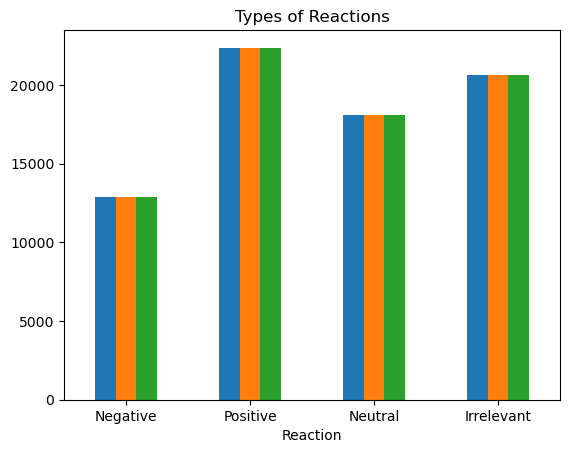

In [13]:
ax=df.groupby('Reaction').count().plot(kind='bar',title='Types of Reactions',legend=False)
ax.set_xticklabels(['Negative','Positive','Neutral','Irrelevant'], rotation=0)

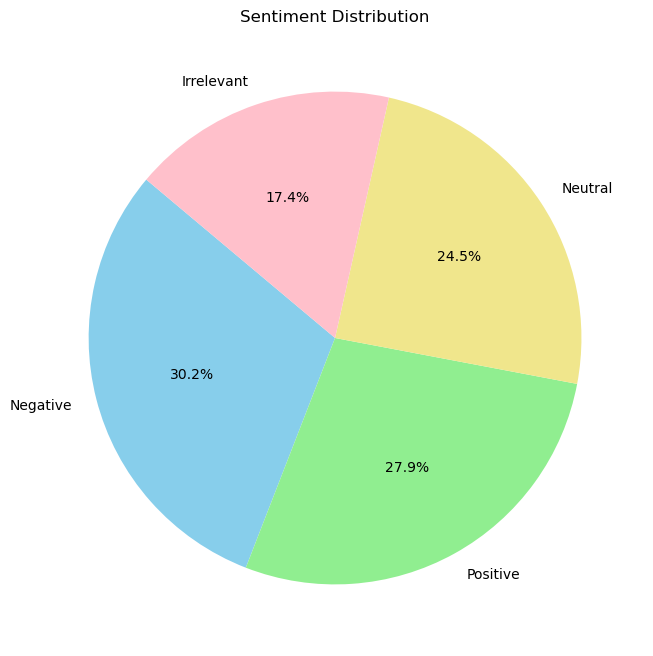

In [14]:
# Calculate the counts for each sentiment
sentiment_counts = df['Reaction'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'lightgreen', 'khaki', 'pink'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()

<Axes: xlabel='Reaction', ylabel='count'>

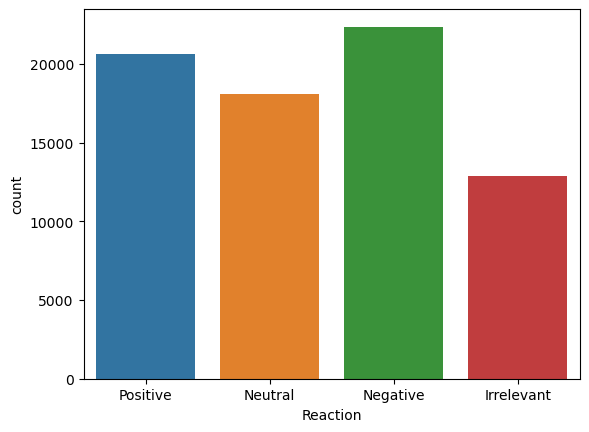

In [15]:
sns.countplot(x='Reaction', data=df)

In [16]:
df['Tweets']=df['Tweets'].str.lower()

In [17]:
df

,Number,About,Reaction,Tweets
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,just realized between the windows partition of...


In [18]:
import re

In [19]:
df['Tweets']=df['Tweets'].apply(lambda x: re.sub(r'[^\w\s]','',x))

In [20]:
df

,Number,About,Reaction,Tweets
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,just realized between the windows partition of...


In [21]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(Tweets):
    translator = str.maketrans('', '', punctuations_list)
    return Tweets.translate(translator)
df['Tweets']= df['Tweets'].apply(lambda x: cleaning_punctuations(x))
df['Tweets'].tail()

74677    just realized that the windows partition of my...
74678    just realized that my mac window partition is ...
74679    just realized the windows partition of my mac ...
74680    just realized between the windows partition of...
74681    just like the windows partition of my mac is l...
Name: Tweets, dtype: object

In [22]:
def cleaning_repeating_char(Tweets):
    return re.sub(r'(.)1+', r'1', Tweets)
df['Tweets'] = df['Tweets'].apply(lambda x: cleaning_repeating_char(x))
df['Tweets'].tail()

74677    just realized that the windows partition of my...
74678    just realized that my mac window partition is ...
74679    just realized the windows partition of my mac ...
74680    just realized between the windows partition of...
74681    just like the windows partition of my mac is l...
Name: Tweets, dtype: object

In [23]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['Tweets'] = df['Tweets'].apply(lambda x: cleaning_URLs(x))
df['Tweets'].tail()

74677    just realized that the windows partition of my...
74678    just realized that my mac window partition is ...
74679    just realized the windows partition of my mac ...
74680    just realized between the windows partition of...
74681    just like the windows partition of my mac is l...
Name: Tweets, dtype: object

In [24]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['Tweets'] = df['Tweets'].apply(lambda x: cleaning_numbers(x))
df['Tweets'].tail()

74677    just realized that the windows partition of my...
74678    just realized that my mac window partition is ...
74679    just realized the windows partition of my mac ...
74680    just realized between the windows partition of...
74681    just like the windows partition of my mac is l...
Name: Tweets, dtype: object

In [25]:
df['tokens']=df['Tweets'].str.split()

In [26]:
df

,Number,About,Reaction,Tweets,tokens
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m..."
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,"[i, am, coming, to, the, borders, and, i, will..."
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you all,"[im, getting, on, borderlands, and, i, will, k..."
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu..."
4,2401,Borderlands,Positive,im getting on borderlands and i will murder y...,"[im, getting, on, borderlands, and, i, will, m..."
...,...,...,...,...,...
74677,9200,Nvidia,Positive,just realized that the windows partition of my...,"[just, realized, that, the, windows, partition..."
74678,9200,Nvidia,Positive,just realized that my mac window partition is ...,"[just, realized, that, my, mac, window, partit..."
74679,9200,Nvidia,Positive,just realized the windows partition of my mac ...,"[just, realized, the, windows, partition, of, ..."
74680,9200,Nvidia,Positive,just realized between the windows partition of...,"[just, realized, between, the, windows, partit..."


In [27]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhivy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
stop_words=set(stopwords.words('english'))
df['tokens']=df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [29]:
df['tokens']

0                       [im, getting, borderlands, murder]
1                                  [coming, borders, kill]
2                         [im, getting, borderlands, kill]
3                        [im, coming, borderlands, murder]
4                       [im, getting, borderlands, murder]
                               ...                        
74677    [realized, windows, partition, mac, like, year...
74678    [realized, mac, window, partition, years, behi...
74679    [realized, windows, partition, mac, years, beh...
74680    [realized, windows, partition, mac, like, year...
74681    [like, windows, partition, mac, like, years, b...
Name: tokens, Length: 73996, dtype: object

In [30]:
from nltk.stem import PorterStemmer
nltk.download('wordnet')
stemmer=PorterStemmer()
df['stemmed']=df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dhivy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
df[['tokens','stemmed']]

,tokens,stemmed
0,"[im, getting, borderlands, murder]","[im, get, borderland, murder]"
1,"[coming, borders, kill]","[come, border, kill]"
2,"[im, getting, borderlands, kill]","[im, get, borderland, kill]"
3,"[im, coming, borderlands, murder]","[im, come, borderland, murder]"
4,"[im, getting, borderlands, murder]","[im, get, borderland, murder]"
...,...,...
74677,"[realized, windows, partition, mac, like, year...","[realiz, window, partit, mac, like, year, behi..."
74678,"[realized, mac, window, partition, years, behi...","[realiz, mac, window, partit, year, behind, nv..."
74679,"[realized, windows, partition, mac, years, beh...","[realiz, window, partit, mac, year, behind, nv..."
74680,"[realized, windows, partition, mac, like, year...","[realiz, window, partit, mac, like, year, behi..."


In [32]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['Tweets'] = df['Tweets'].apply(lambda x: lemmatizer_on_text(x))
df['Tweets'].head()

0    im getting on borderlands and i will murder yo...
1    i am coming to the borders and i will kill you...
2    im getting on borderlands and i will kill you all
3    im coming on borderlands and i will murder you...
4    im getting on borderlands  and i will murder y...
Name: Tweets, dtype: object

In [33]:
x=df['Tweets']
y=df['Tweets']

In [34]:
! pip install wordcloud

In [35]:
from wordcloud import WordCloud

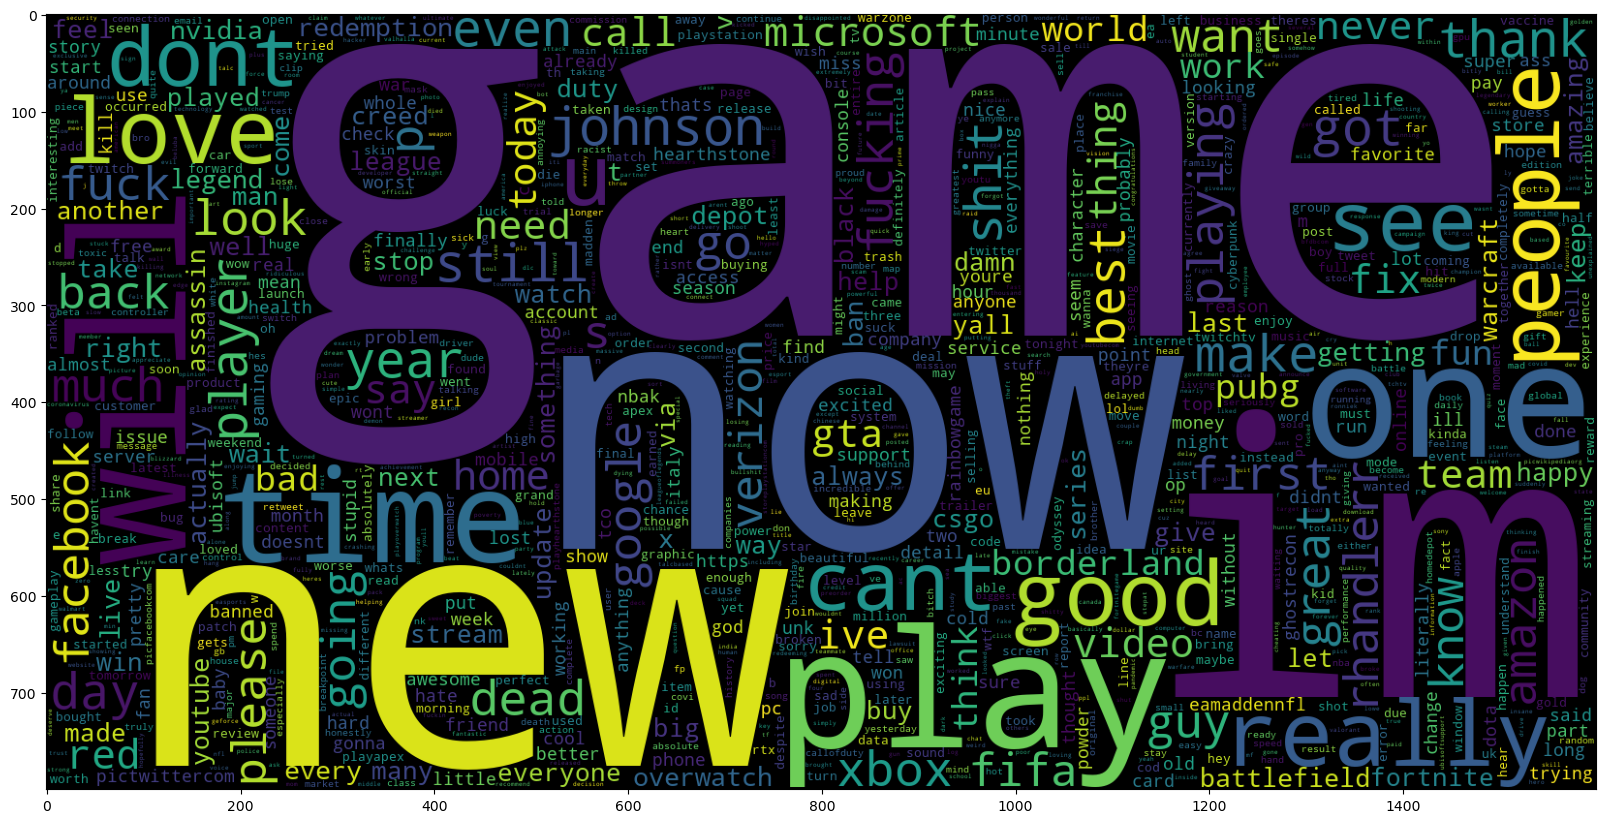

In [36]:
neg=df['Tweets'][:80000]
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1000,width=1600,height=800,
            collocations=False).generate("".join(neg))
plt.imshow(wc)

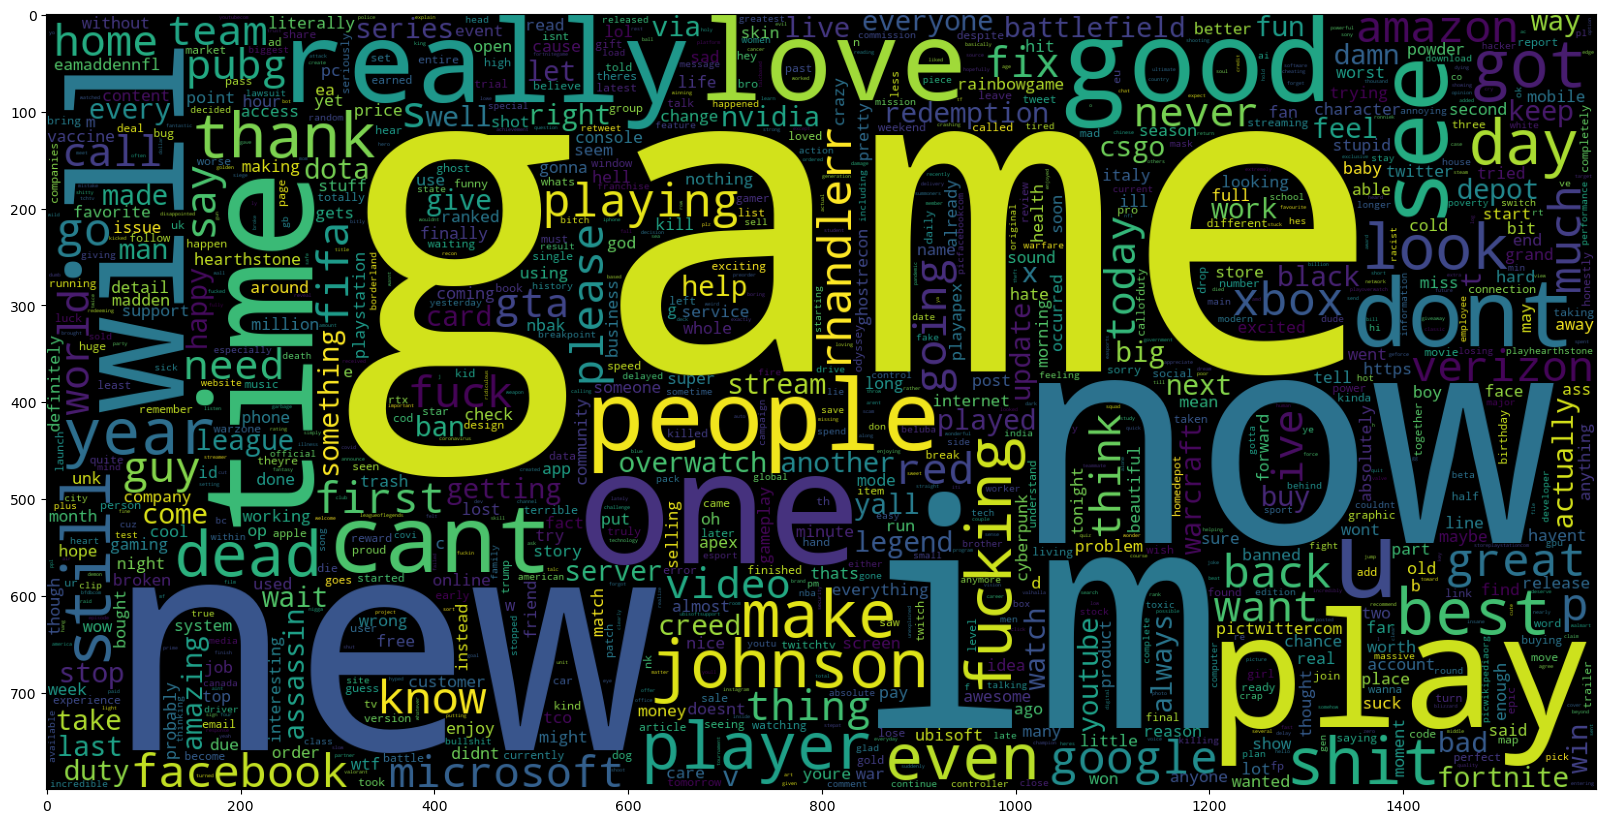

In [37]:
pos=df['Tweets'][2000:]
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1000,width=1600,height=800,
            collocations=False).generate("".join(pos))
plt.imshow(wc)

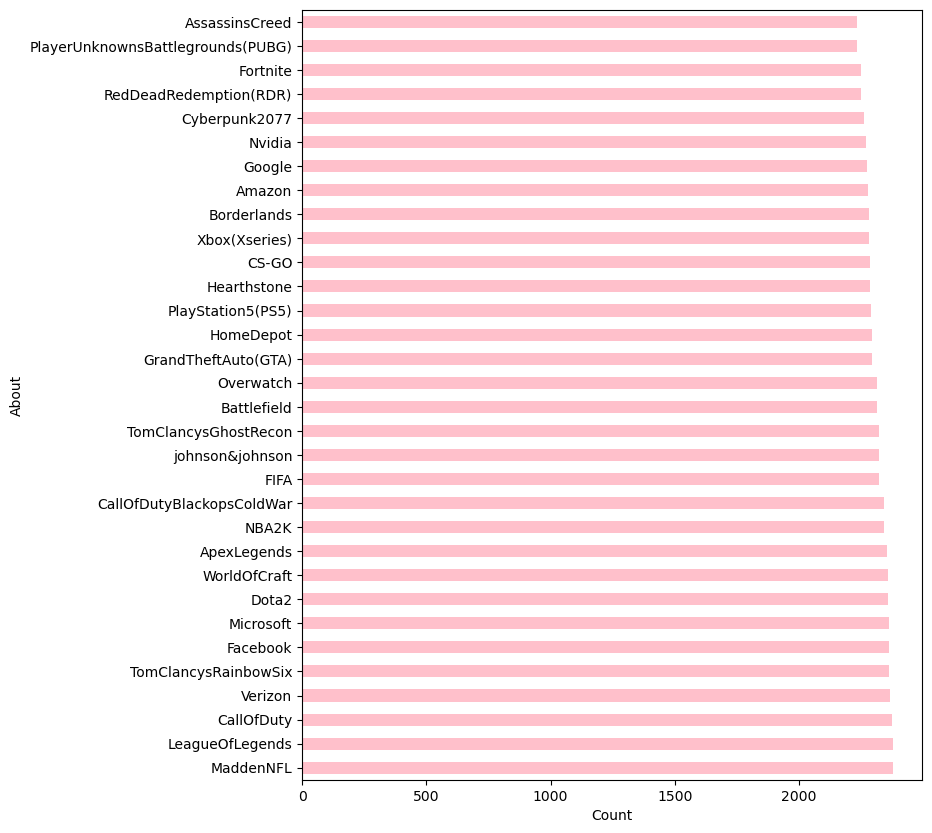

In [38]:
plt.figure(figsize=(8,10))
df['About'].value_counts().plot(kind='barh',color='pink')
plt.xlabel("Count")
plt.show()

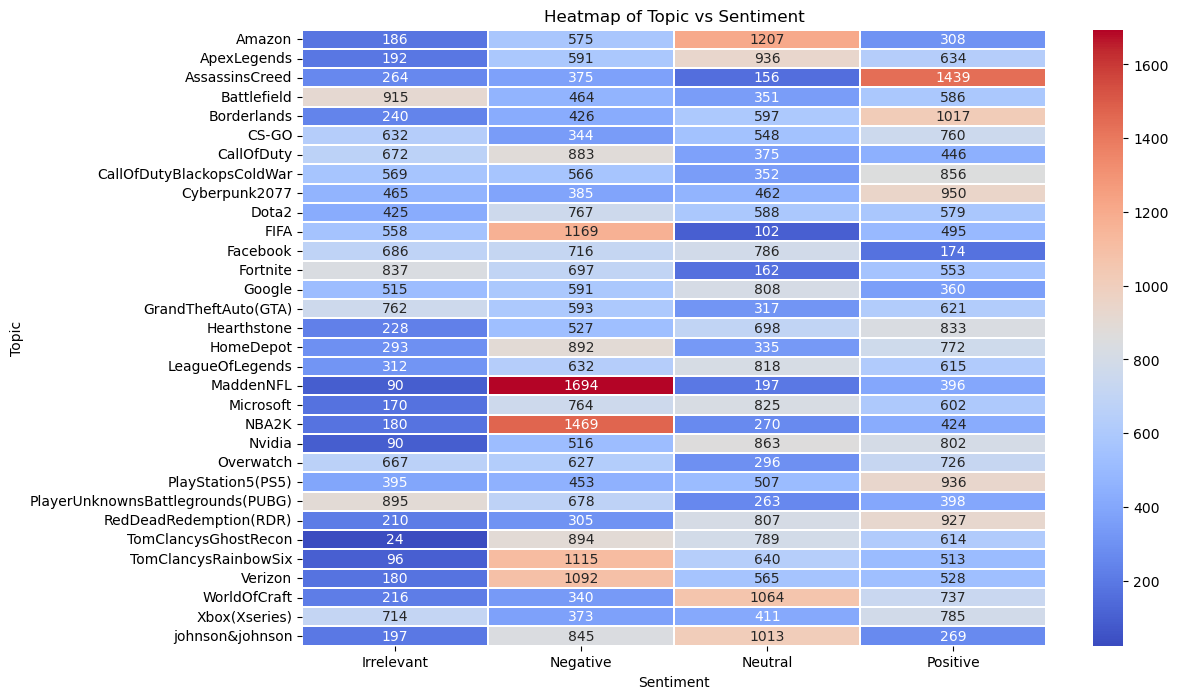

In [39]:
# Create the crosstab
crosstab = pd.crosstab(index=df['About'], columns=df['Reaction'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.10)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()

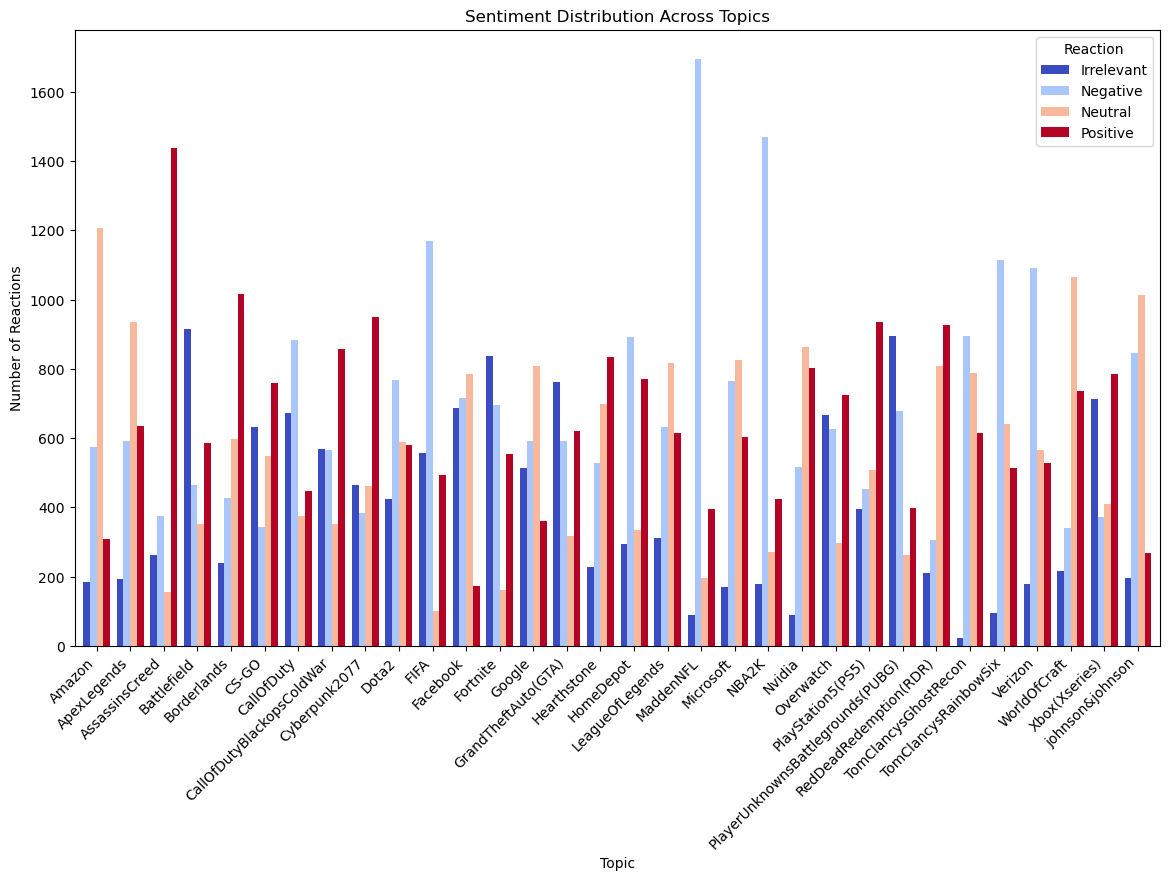

In [40]:
# Create the crosstab
crosstab = pd.crosstab(index=df['About'], columns=df['Reaction'])

# Plot the clustered bar plot
crosstab.plot(kind='bar', figsize=(14, 8), colormap='coolwarm', width=0.8)

# Add labels and title
plt.title('Sentiment Distribution Across Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Reactions')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


D:\Users\dhivy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


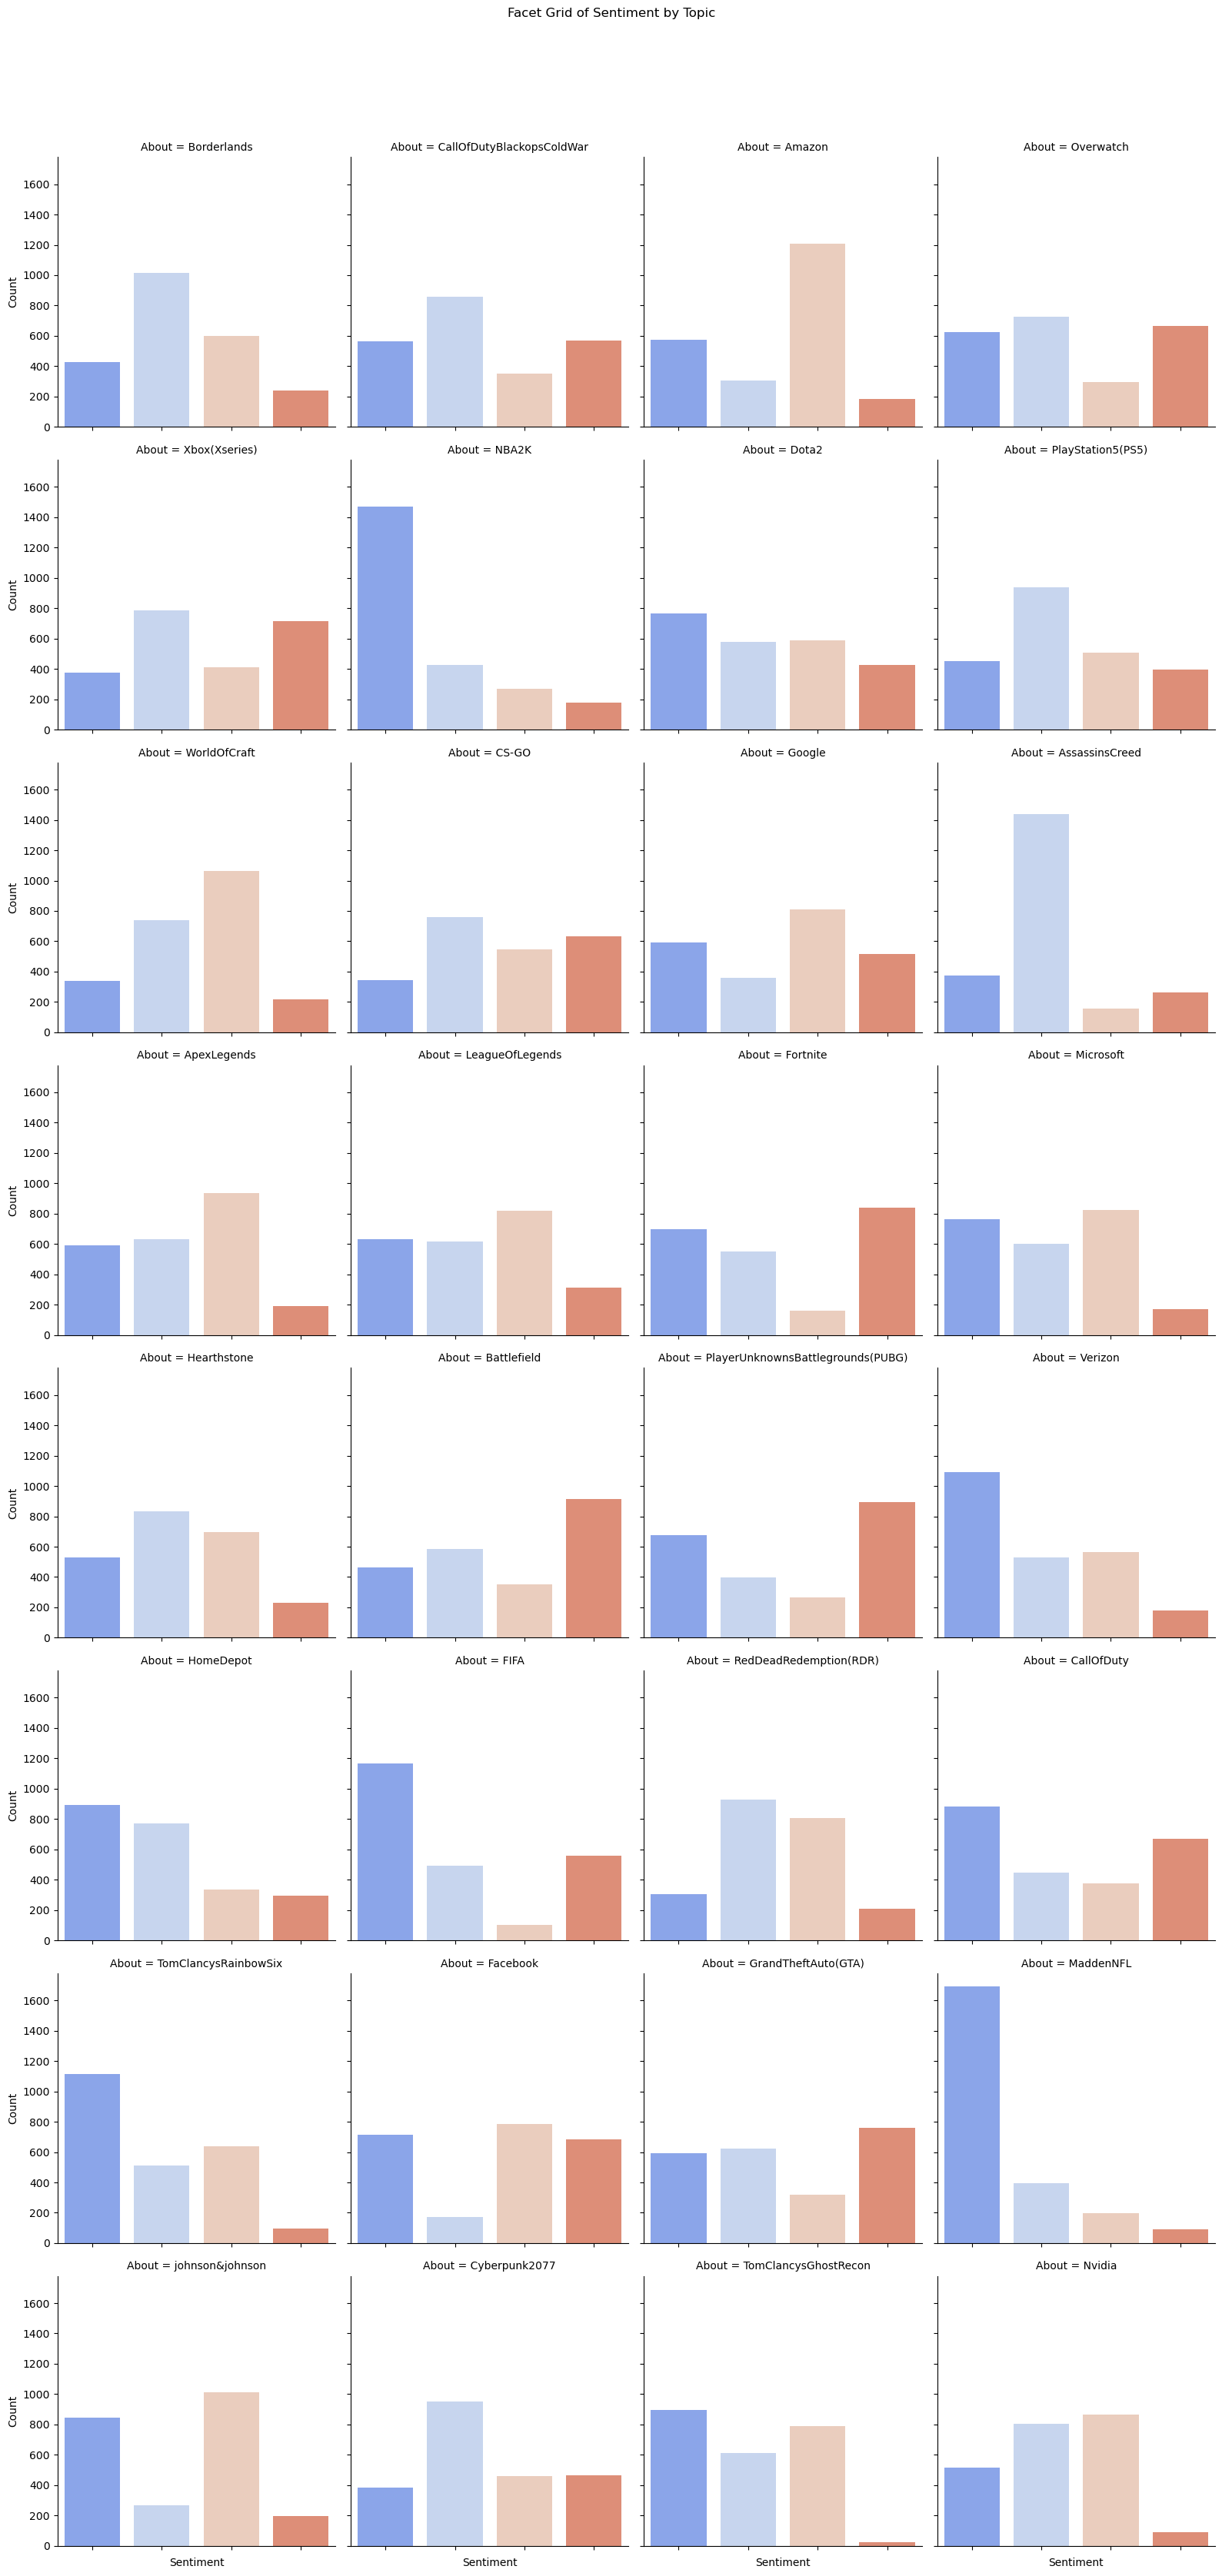

In [41]:
g = sns.FacetGrid(df, col='About', col_wrap=4, height=4)
g.map(sns.countplot, 'Reaction', palette='coolwarm', order=df['Reaction'].value_counts().index)

# Add labels and title
g.fig.suptitle('Facet Grid of Sentiment by Topic', y=1.05)
g.set_axis_labels('Sentiment', 'Count')
g.set_xticklabels(rotation=45)

# Show the plot
plt.show()


In [50]:
from textblob import TextBlob
# Function to analyze sentiment
def get_sentiment(Tweets):
    analysis = TextBlob(Tweets)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'

# Apply sentiment analysis to each tweet
df['Reaction'] = df['Tweets'].apply(get_sentiment)

# Count the number of positive and negative tweets
positive_tweets = df['Reaction'].value_counts().get('Positive', 0)
negative_tweets = df['Reaction'].value_counts().get('Negative', 0)
neutral_tweets=df['Reaction'].value_counts().get('Neutral',0)
# Output the results
print(f"Positive Tweets: {positive_tweets}")
print(f"Negative Tweets: {negative_tweets}")
print(f"Neutral Tweets: {neutral_tweets}")


Positive Tweets: 33889
Negative Tweets: 21212
Neutral Tweets: 18895


## Sentiment Analysis on Google

In [76]:
from textblob import TextBlob

# Function to analyze sentiment
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Irrelevant'

# Filter tweets containing "Google"
google_tweets = df[df['Tweets'].str.contains("Google", case=False, na=False)]

# Apply sentiment analysis to each tweet mentioning Google
google_tweets.loc[:,'Reaction'] = google_tweets['Tweets'].apply(get_sentiment)

# Count the number of positive, negative, and neutral tweets about Google
positive_tweets = google_tweets['Reaction'].value_counts().get('Positive', 0)
negative_tweets = google_tweets['Reaction'].value_counts().get('Negative', 0)
neutral_tweets = google_tweets['Reaction'].value_counts().get('Neutral', 0)
irr_tweets = google_tweets['Reaction'].value_counts().get('Irrelevant', 0)
# Output the results
print(f"Positive Tweets about Google: {positive_tweets}")
print(f"Negative Tweets about Google: {negative_tweets}")
print(f"Neutral Tweets about Google: {neutral_tweets}")
print(f"Irrelevant Tweets about Google: {irr_tweets}")


Positive Tweets about Google: 990
Negative Tweets about Google: 638
Neutral Tweets about Google: 413
Irrelevant Tweets about Google: 0


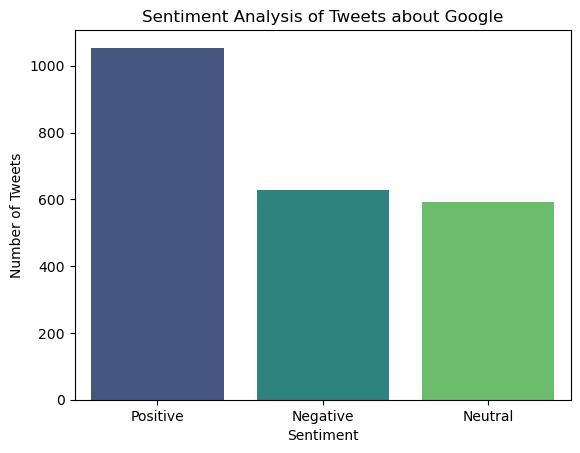

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation: Create a DataFrame for plotting
sentiment_counts = filtered_df['Reaction'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Bar plot visualization
sns.barplot(x='Sentiment', y='Count', data=sentiment_counts, palette='viridis')

# Add labels and title
plt.title('Sentiment Analysis of Tweets about Google')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

# Display the plot
plt.show()


## Sentiment Analysis on Amazon

Positive Tweets about Amazon: 1126
Negative Tweets about Amazon: 407
Neutral Tweets about Amazon: 383


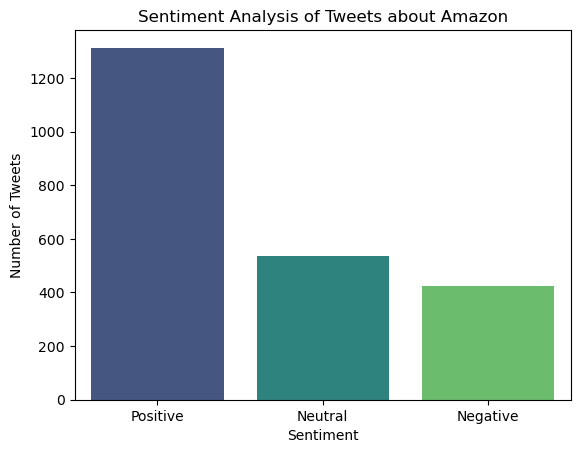

In [75]:
# Function to analyze sentiment
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'


# Filter tweets containing "Google"
amazon_tweets = df[df['Tweets'].str.contains("Amazon", case=False, na=False)]

# Apply sentiment analysis to each tweet mentioning Google
amazon_tweets.loc[:,'Reaction'] = amazon_tweets['Tweets'].apply(get_sentiment)

# Count the number of positive, negative, and neutral tweets about Google
positive_tweets = amazon_tweets['Reaction'].value_counts().get('Positive', 0)
negative_tweets = amazon_tweets['Reaction'].value_counts().get('Negative', 0)
neutral_tweets = amazon_tweets['Reaction'].value_counts().get('Neutral', 0)

# Output the results
print(f"Positive Tweets about Amazon: {positive_tweets}")
print(f"Negative Tweets about Amazon: {negative_tweets}")
print(f"Neutral Tweets about Amazon: {neutral_tweets}")

# Data preparation: Create a DataFrame for plotting
sentiment_counts = amazon_df['Reaction'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Bar plot visualization
sns.barplot(x='Sentiment', y='Count', data=sentiment_counts, palette='viridis')

# Add labels and title
plt.title('Sentiment Analysis of Tweets about Amazon')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

# Display the plot
plt.show()